<a href="https://colab.research.google.com/github/M3liss/BA-Project---1st-draft/blob/main/yolov7_det.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Requirements

There are a few requirements that need to be fulfilled before the the actual testing can start. Please make sure beforehand that you have added the repository to your google drive to save the different weights and models to your own directory.

1. Change the resources to GPU for better training.
2. Run the first cell to Install all requirements and git init to create an empty repository. Please note that you need to change the path to the requirements file to your own repository in google drive.
3. Make sure that the train and test data is in /val and /train folders. 
4. Create a cfg/training/yolov7.yaml file. This file has can be templated from cfg/training/yolov7.yaml. It needs to have the correct number of classes, the correct labels and the correct folders for train and val.
5. Add the images to test and val folders that you specified beforehand. If you have run the algorithm before and changed these folders, delete the cache folder. 

Make sure all of these steps are done before starting.







In [ ]:
!pip install -r /content/drive/MyDrive/BA/yolov7-main/requirements.txt
! pip install onnx
! git init

In [ ]:
# move into directory
%cd /content/drive/MyDrive/BA/yolov7-main
%pwd

/content/drive/MyDrive/BA/yolov7-main


'/content/drive/MyDrive/BA/yolov7-main'

# Training

The process of training can be individualised and changed. For this project, there are _ different trainings that were implemented.
How to train:
1. Go into your repository in google drive.
2. From there, you can run every training specified below. Have a look at the ones that are already done to individualise them.
3. Reparametialize them. For this, copy the path of best.pt for your new model and add it to the path in reparameterization.py. This makes them cleaner to use later on.
4. Export it into ONNX model.

After training, each best.pt can be found in runs under their respective folders /weights/best.pt. To see the results, open up the results.png in their respective folders to compare. 


###Training from scratch
This training trains from scratch without any weights to get a baseline for 100 epochs with 8 workers.

Results: 
*   Time: ~ 30 mins
*   Accuracy (mAP@0.5): 0.6


In [ ]:
!python train.py --workers 8 --device 0 --batch-size 10 --epochs 100 --img 640 640 --hyp data/hyp.scratch.custom.yaml --name from_scratch --weights '' --cfg cfg/training/yolov7.yaml

In [ ]:
# export to onnx
! python export.py --weights 'runs/train/from_scratch/weights/yolov7.pt' --grid --end2end --topk-all 100 --iou-thres 0.65 --conf-thres 0.35 --img-size 640 640 --max-wh 640

### Training with a pretrained model

This training trains with the pretrained model from the COCO dataset. It can be found on github. This has again 100 epochs and 8 workers.

Results: 
*   Time: 1 hour
*   
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100% 3/3 [00:01<00:00,  2.02it/s]
                 all          71          99       0.946       0.921       0.968       0.779
                ball          71          48       0.957       0.979       0.992       0.754
                hand          71          51       0.936       0.863       0.944       0.805

In [ ]:
!python train.py --workers 8 --device 0 --batch-size 15 --epochs 100 --img 640 640 --hyp data/hyp.scratch.custom.yaml --name pretrained_100 --weights 'yolov7_training.pt' --cfg cfg/training/yolov7.yaml

In [ ]:
# export to onnx
!python export.py --weights 'runs/train/pretrained_100/weights/yolov7.pt' --grid --end2end --topk-all 100 --iou-thres 0.65 --conf-thres 0.35 --img-size 640 640 --max-wh 640

### Training with a pretrained model

This training trains with the pretrained model from the COCO dataset. It can be found on github. This has again 500 epochs and 8 workers.

Results: 
*   Time:
*   Accuracy (mAP):

In [ ]:
!python train.py --workers 8 --device 0 --batch-size 15 --epochs 500 --img 640 640 --hyp data/hyp.scratch.custom.yaml --name pretrained_500 --weights 'yolov7_training.pt' --cfg cfg/training/yolov7.yaml

In [ ]:
# export to onnx
!python export.py --weights 'runs/train/pretrained_500/weights/yolov7.pt' --grid --end2end --topk-all 100 --iou-thres 0.65 --conf-thres 0.35 --img-size 640 640 --max-wh 640

### Training with a augmented dataset

This training trains with the pretrained model from the COCO dataset as well as the augmented images to see the difference. This has again 100 epochs and 8 workers.

Results: 
*   Time:
*   Accuracy (mAP):

In [ ]:
!python train.py --data data/coco.yaml --cfg cfg/training/yolov7.yaml --weights 'yolov7_training.pt' --batch-size 15 --epochs 100 --img 640 640 --device 0 --hyp data/hyp.scratch.custom.yaml --name pretr_augm_100

In [ ]:
# export to onnx
! python export.py --weights 'runs/train/pretr_augm_100/weights/yolov7.pt' --grid --end2end --topk-all 100 --iou-thres 0.65 --conf-thres 0.35 --img-size 640 640 --max-wh 640

### Training with less data

This training trains with the pretrained model from the COCO dataset as well as only half of the original dataset. This has again 100 epochs and 8 workers.

Results: 
*   Time:
*   Accuracy (mAP):

### Training with less data

This training trains with the pretrained model from the COCO dataset as well as only half of the original dataset. This has 200 epochs and 8 workers to see whether more time can make up for missing data.

Results: 
*   Time:
*   Accuracy (mAP):

# Testing

The testing part is mostly to test the algorithm on existing images and videos. Create your own or use the images and videos provided in /test_img.

1. Run the detect.py file with your custom weights. This will then save a file in /deploy for you to inspect.
2. You can add your own images and videos. Just change the source in the next line.




In [ ]:
!python detect.py --weights runs/train/from_scratch/weights/best.pt --conf 0.5 --img-size 320 --source "test_img/test1.jpg" --no-trace

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', exist_ok=False, img_size=320, iou_thres=0.45, name='exp', no_trace=True, nosave=False, project='runs/detect', save_conf=False, save_txt=False, source='test_img/test1.jpg', update=False, view_img=False, weights=['runs/train/from_scratch/weights/best.pt'])
YOLOR 🚀 2023-2-9 torch 1.13.1+cu116 CUDA:0 (Tesla T4, 15109.875MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
/usr/local/lib/python3.8/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 314 layers, 36487166 parameters, 6194944 gradients, 103.2 GFLOPS
Done. (15.7ms) Inference, (2.2ms) NMS
 The image with the result is saved in: runs/detect/e

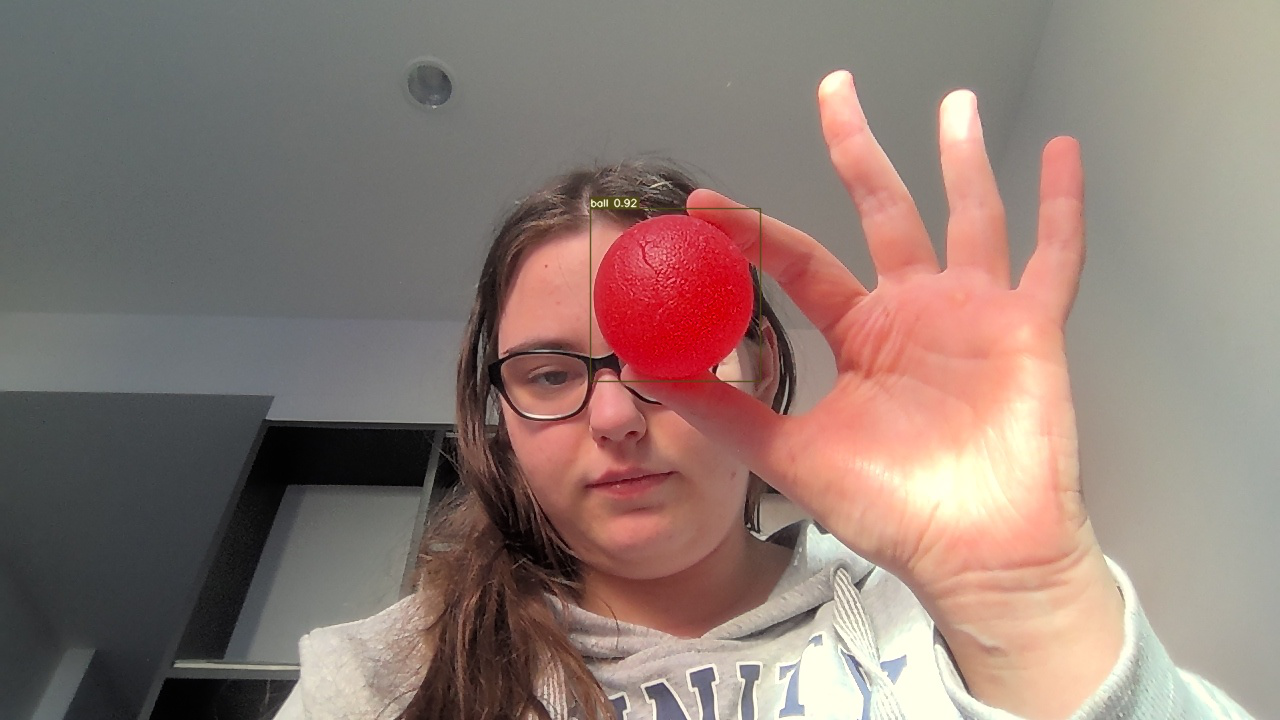

In [ ]:
# display image
from IPython.display import display
from IPython.display import Video
from PIL import Image

# for images
path_img="runs/detect/exp7/try.jpg"
display(Image.open(path_img))

In [ ]:
!python try_det.py --weights runs/train/pretrained_100/weights/best.pt --conf 0.5 --img-size 320 --source "test_img/test12.jpg" --no-trace

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', exist_ok=False, img_size=320, iou_thres=0.45, name='exp', no_trace=True, nosave=False, project='runs/detect', save_conf=False, save_txt=False, source='test_img/test12.jpg', update=False, view_img=False, weights=['runs/train/pretrained_100/weights/best.pt'])
YOLOR 🚀 2023-2-9 torch 1.13.1+cu116 CPU

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
/usr/local/lib/python3.8/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 314 layers, 36487166 parameters, 6194944 gradients, 103.2 GFLOPS
132 0.0 [0.3863281309604645, 0.5826388597488403, 0.08359374850988388, 0.15694443881511688]
conf: 0.9313134551048279

In [ ]:
!python try_det.py --weights runs/train/pretrained_100/weights/best.pt --conf 0.5 --img-size 640 --source "test_img/test11.jpg" --no-trace

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', no_trace=True, nosave=False, project='runs/detect', save_conf=False, save_txt=False, source='test_img/test11.jpg', update=False, view_img=False, weights=['runs/train/pretrained_100/weights/best.pt'])
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', no_trace=True, nosave=False, project='runs/detect', save_conf=False, save_txt=False, source='test_img/test11.jpg', update=False, view_img=False, weights=['runs/train/pretrained_100/weights/best.pt'])
YOLOR 🚀 2023-2-9 torch 1.13.1+cu116 CPU

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
/usr/local/lib/python3.8/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argu